# Project: Phân Tích Nhân Sự – Dự Đoán Tỷ Lệ Nghỉ Việc

<b> Về bối cảnh và vấn đề của dự án:

Bộ phận Nhân sự tại Salifort Motors muốn thực hiện một số sáng kiến để cải thiện mức độ hài lòng của nhân viên trong công ty. Họ đã thu thập dữ liệu từ nhân viên, nhưng hiện tại họ không biết phải làm gì với dữ liệu đó. Vì vậy, họ tìm đến bạn và yêu cầu bạn đưa ra các đề xuất dựa trên dữ liệu để giúp họ hiểu rõ hơn.

Câu hỏi họ đặt ra là: <b> Những yếu tố nào có thể khiến nhân viên rời khỏi công ty?

Mục tiêu của bạn trong dự án này là phân tích dữ liệu mà bộ phận Nhân sự đã thu thập và xây dựng một mô hình dự đoán liệu một nhân viên có rời công ty hay không.

Nếu có thể dự đoán được những nhân viên có khả năng nghỉ việc, ta có thể xác định các yếu tố góp phần vào quyết định đó. Vì quá trình tìm kiếm, phỏng vấn và tuyển dụng nhân sự mới tốn nhiều thời gian và chi phí, việc gia tăng tỷ lệ giữ chân nhân viên sẽ mang lại lợi ích cho công ty.

<b> Về dataset: 
Tham khảo thêm tại [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)

Variable  |Description |
-----|-----|
satisfaction_level|Mức độ hài lòng của nhân viên [0&ndash;1]|
last_evaluation|Số điểm đánh giá công việc của nhân viên lần gần nhất [0&ndash;1]|
number_project|Số lượng dự án nhân viên tham gia|
average_monthly_hours|Số giờ nhân viên làm việc trung bình tháng|
time_spend_company|Thâm niên của nhân viên (năm)
Work_accident|Nhân viên có bị tai nạn lao động hay không
left|Nhân viên có rời công ty hay không
promotion_last_5years|Nhân viên có được thăng chức trong vòng 5 năm trở lại hay không
Department|Phòng ban của nhân viên
salary|Lương (Đô_la Mỹ)

## 1. Nhập thư viện và tải dữ liệu

In [10]:
# Thao tác
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Hiện toàn bộ cột
pd.set_option('display.max_columns', None)

# Data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Các metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Lưu model
import pickle

In [11]:
df0 = pd.read_csv("HR_capstone_dataset.csv")

df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## 2. Khám phá dữ liệu và làm sạch

### Thông tin cơ bản

In [14]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Thống kê mô tả

In [16]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Đổi tên cột

In [18]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [19]:
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Kiểm tra giá trị thiếu

In [21]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Kiểm tra giá trị trùng lặp

In [23]:
df0.duplicated().sum()

3008

In [24]:
df1 = df0.drop_duplicates(keep='first')

### Kiểm tra trá trị ngoại lệ (Outliers)

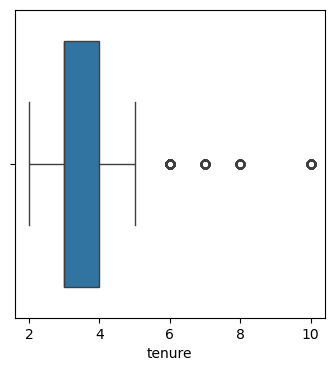

In [26]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df1['tenure'])
plt.show()

In [27]:
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
print("Số hàng chứa giá trị ngoại lệ trong cột `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Số hàng chứa giá trị ngoại lệ trong cột `tenure`: 824


### Số lượng nhân viên nghỉ việc

In [29]:
# Số lượng
print(df1['left'].value_counts())
print()

# Phần trăm
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Trực quan hoá

<b>Biểu đồ hộp cho số giờ làm việc trung bình tháng phân bổ cho số lượng dự án, so sánh giữa nhân viên rời đi và không rời đi.\
Bên cạnh đó là biểu đồ tần suất cho chúng ta biết thêm về số lượng nhân viên phân bổ theo số lượng dự án.

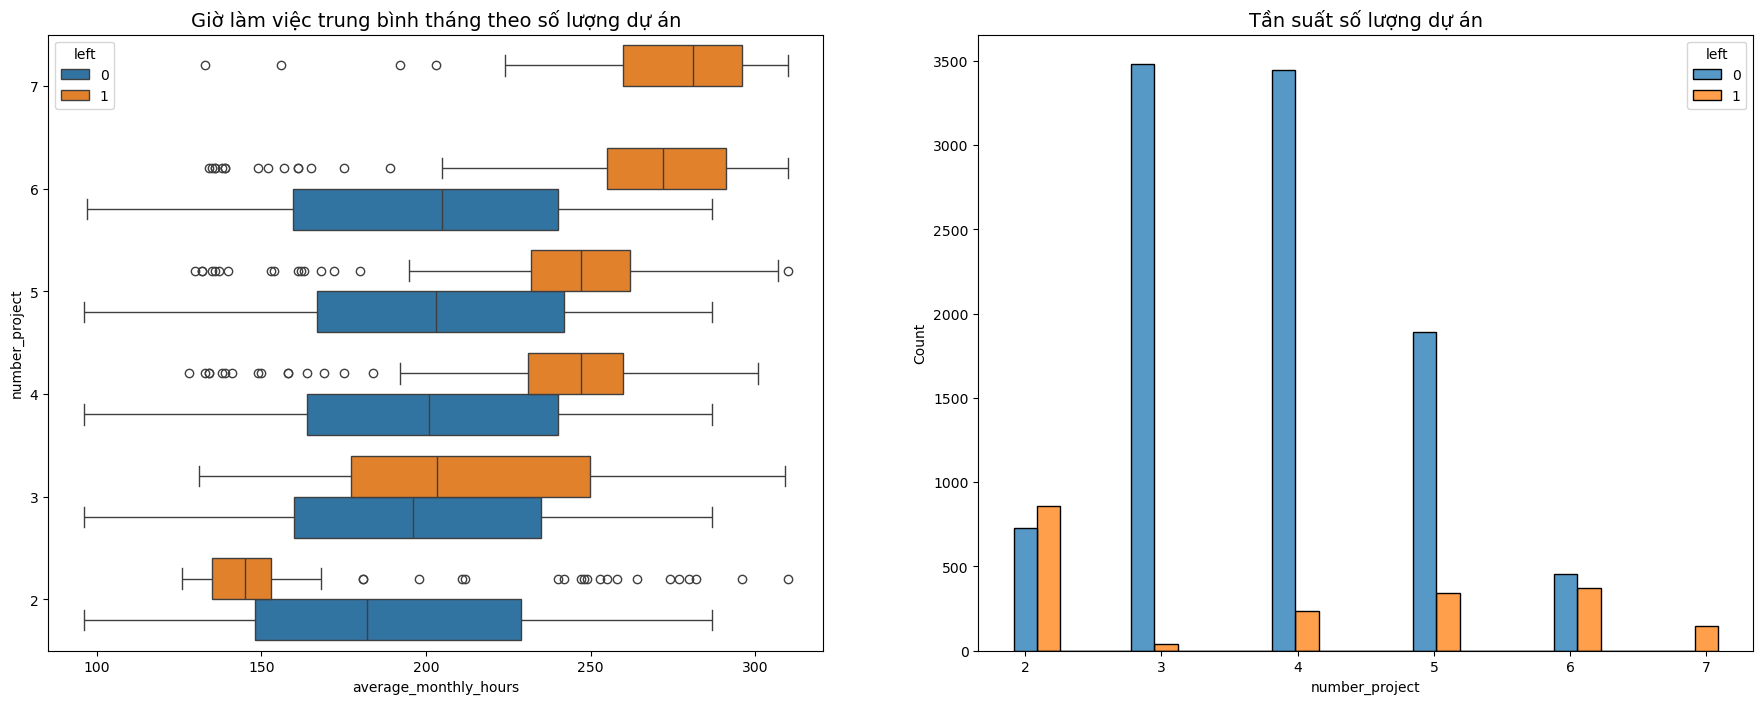

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Giờ làm việc trung bình tháng theo số lượng dự án', fontsize='14')

tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Tần suất số lượng dự án', fontsize='14')

plt.show()

Có thể dễ hiểu rằng những người làm nhiều dự án hơn cũng sẽ làm việc trong thời gian dài hơn. Khi số giờ làm việc trung bình của mỗi nhóm (ở lại và rời đi) tăng lên theo số lượng dự án họ tham gia. Tuy nhiên, có một số điểm đáng chú ý từ biểu đồ này.

1. Có hai nhóm nhân viên đã rời công ty:\
(A) Những người làm việc ít hơn đáng kể so với đồng nghiệp có cùng số lượng dự án.\
(B) Những người làm việc nhiều hơn đáng kể.\
    Đối với nhóm A, có khả năng họ đã bị sa thải hoặc nhóm này cũng có thể bao gồm những nhân viên đã xin nghỉ việc trước đó và được giao ít giờ làm hơn. Đối với nhóm B, có thể thấy rằng họ đã tự xin nghỉ. Những người trong nhóm B có thể đã đóng góp rất nhiều vào các dự án họ tham gia.
2. Tất cả những nhân viên làm bảy dự án đều rời công ty, và phạm vi của nhóm này, cùng với những người rời đi khi làm sáu dự án, là khoảng 255–295 giờ/tháng, nhiều hơn đáng kể so với bất kỳ nhóm nào khác.
3. Số lượng dự án tối ưu mà nhân viên nên làm có vẻ là 3–4 dự án. Tỷ lệ nhân viên rời đi trên tổng số nhân viên trong nhóm này là rất nhỏ.
4. Nếu giả định một tuần làm việc tiêu chuẩn là 40 giờ và có hai tuần nghỉ phép mỗi năm, thì số giờ làm việc trung bình mỗi tháng của nhân viên làm từ thứ Hai đến thứ Sáu sẽ là: 50 tuần * 40 tiếng mỗi tuần / 12 tháng = 166.67 tiếng.\
    Điều này có nghĩa là, ngoại trừ những nhân viên làm hai dự án, tất cả các nhóm nhân viên — kể cả những người không rời công ty—đều làm việc nhiều hơn đáng kể so với mức này. Dường như nhân viên ở đây đang bị quá tải công việc.

<b>Biểu đồ phân tán giữa giờ làm trung bình tháng với mức độ hài lòng, so sánh giữa nhân viên rời đi và không rời đi.

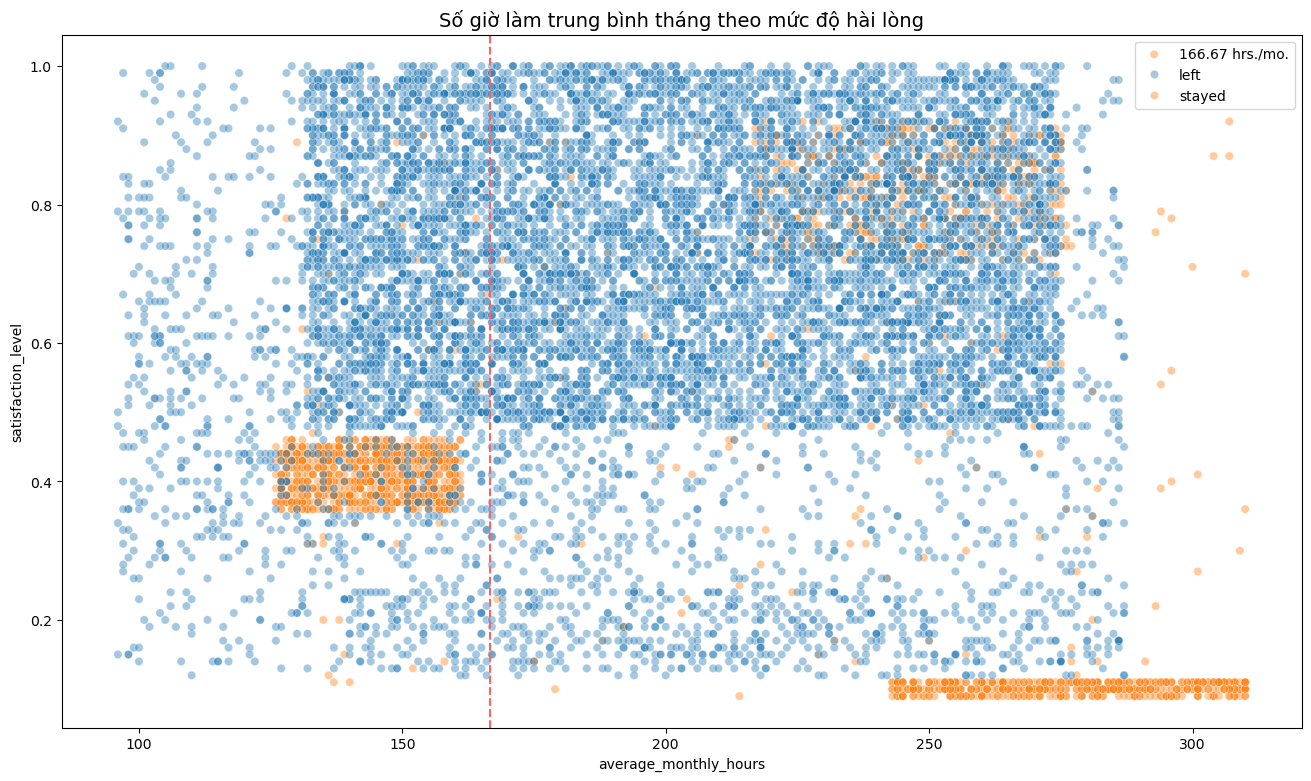

In [35]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Số giờ làm trung bình tháng theo mức độ hài lòng', fontsize='14');

Có một nhóm lớn nhân viên rời đi làm việc khoảng 240–315 giờ/tháng. Làm 315 giờ/tháng tương đương với hơn 75 giờ/tuần trong suốt cả năm. Điều này có thể liên quan đến việc mức độ hài lòng của họ gần như bằng 0.

Biểu đồ cũng cho thấy một nhóm nhân viên khác đã rời công ty, những người có số giờ làm việc bình thường hơn. Tuy nhiên, mức độ hài lòng của họ chỉ vào khoảng 0.4. Rất khó để suy đoán chính xác lý do họ nghỉ việc, nhưng có khả năng họ cảm thấy áp lực phải làm việc nhiều hơn, vì nhiều đồng nghiệp của họ đã làm việc với số giờ rất cao. Áp lực này có thể đã làm giảm mức độ hài lòng của họ.

Cuối cùng, có một nhóm nhân viên làm việc khoảng 210–280 giờ/tháng, và mức độ hài lòng của họ dao động trong khoảng 0.7–0.9.

Ngoài ra, cần lưu ý về hình dạng kỳ lạ của các phân bố dữ liệu. Điều này có thể là dấu hiệu của việc dữ liệu đã bị điều chỉnh hoặc là dữ liệu tổng hợp.

<b> Tiếp tục so sánh mức độ hài lòng với thâm niên của các nhân viên

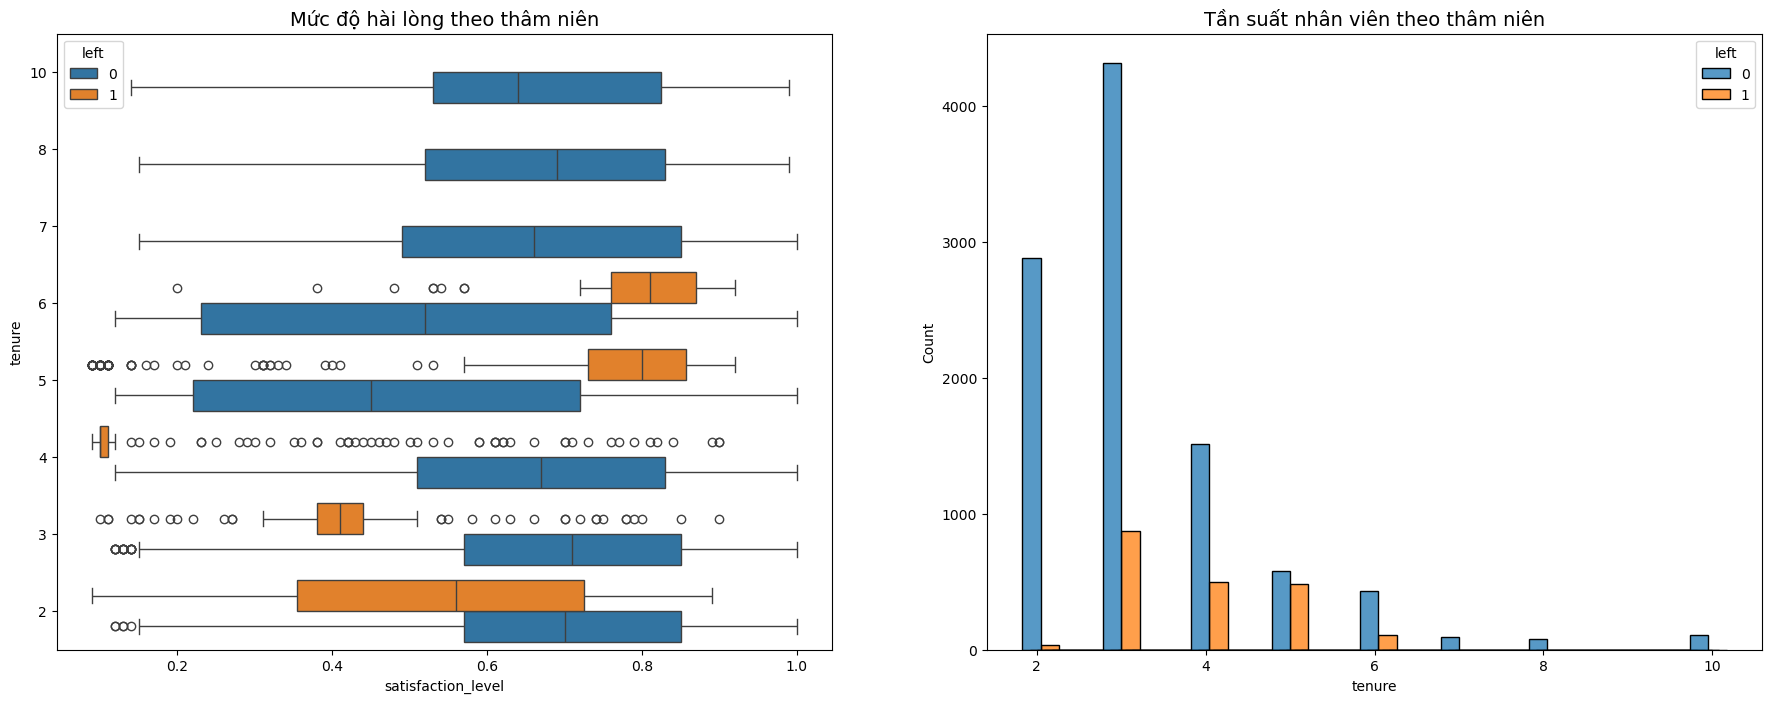

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))


sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Mức độ hài lòng theo thâm niên', fontsize='14')


tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tần suất nhân viên theo thâm niên', fontsize='14')

plt.show();

Có nhiều quan sát có thể rút ra từ biểu đồ này.

Những nhân viên rời công ty có thể chia thành hai nhóm chính:
(A) Nhóm nhân viên không hài lòng với thâm niên ngắn.
(B) Nhóm nhân viên rất hài lòng nhưng có thâm niên trung bình.

Nhân viên có thâm niên 4 năm rời công ty có mức độ hài lòng đặc biệt thấp. Điều này đáng để kiểm tra xem có sự thay đổi chính sách nào của công ty đã ảnh hưởng đến nhóm nhân viên ở mốc 4 năm hay không.

Những nhân viên có thâm niên dài nhất không rời công ty. Mức độ hài lòng của họ tương đương với những nhân viên mới hơn.

Biểu đồ tần suất cho thấy số lượng nhân viên có thâm niên lâu dài khá ít. Có thể đây là những nhân viên cấp cao, có mức lương cao hơn, nên họ có xu hướng gắn bó với công ty lâu hơn.

<b> Tiếp tục so sánh mức lương của nhân viên theo thâm niên của họ

Text(0.5, 1.0, 'Tần suất nhân viên theo mức lương dựa trên thâm niên')

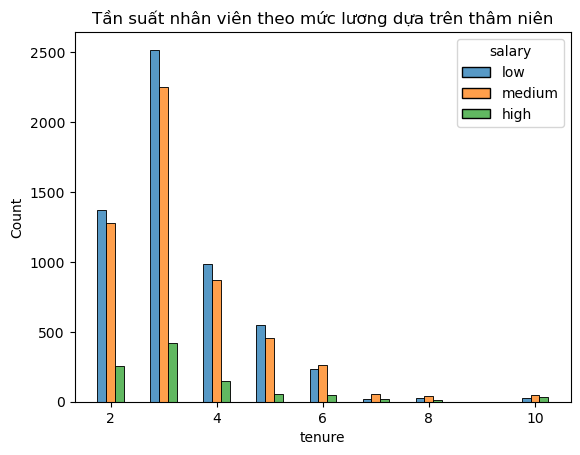

In [41]:
sns.histplot(data=df1, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5)
plt.title('Tần suất nhân viên theo mức lương dựa trên thâm niên')

Biểu đồ trên cho thấy nhân viên có thâm niên lâu năm không chủ yếu là những người có mức lương cao hơn

<b> Số giờ làm trung bình tháng theo số điểm đánh giá công việc gần nhất

Text(0.5, 1.0, 'Giờ làm trung bình theo tháng theo điểm đánh giá hiệu suất công việc')

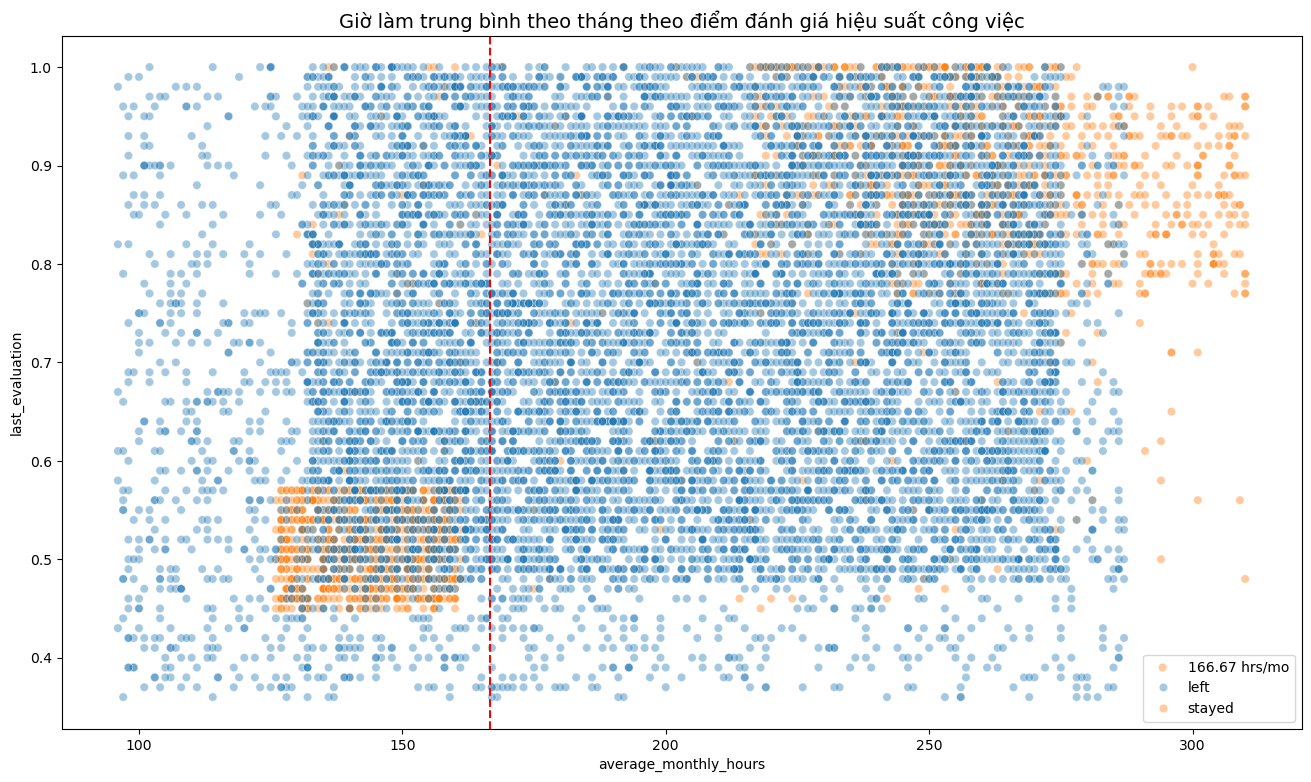

In [44]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='red', label='166.67 hrs/mo', ls='--')
plt.legend(labels=['166.67 hrs/mo', 'left', 'stayed'])
plt.title('Giờ làm trung bình theo tháng theo điểm đánh giá hiệu suất công việc', fontsize='14')

Biểu đồ chỉ ra hai nhóm nhân viên đã rời công ty:
(A) Những nhân viên làm việc quá nhiều nhưng có hiệu suất rất cao.
(B) Những nhân viên làm việc ít hơn mức trung bình giả định (166.67 giờ/tháng) và có điểm đánh giá hiệu suất thấp hơn.

Dường như có mối tương quan giữa số giờ làm việc và điểm đánh giá hiệu suất.

Không có nhiều nhân viên nằm ở góc trên bên trái của biểu đồ; nhưng làm việc nhiều giờ cũng không đảm bảo điểm đánh giá cao.

Phần lớn nhân viên trong công ty làm việc nhiều hơn 167 giờ/tháng.

<b> Số giờ làm trung bình tháng theo việc được thăng chức trong 5 năm trở lại

Text(0.5, 1.0, 'Số giờ làm trung bình tháng theo việc được thăng chức trong vòng 5 năm')

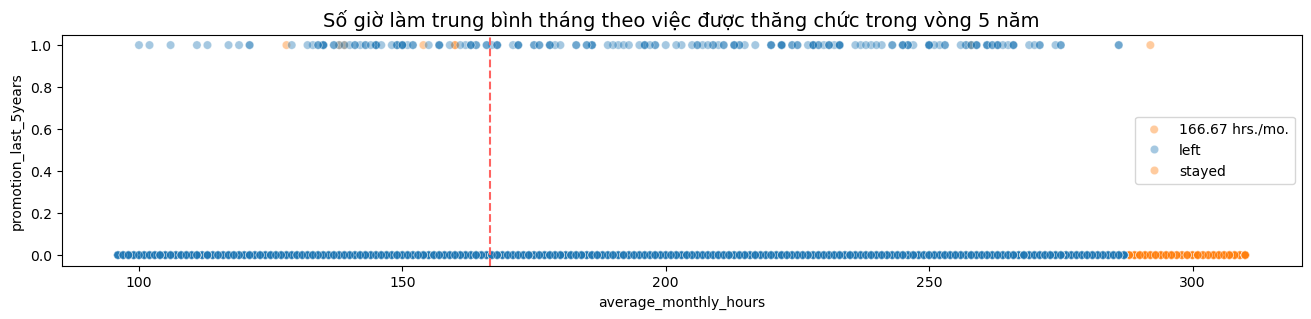

In [47]:
plt.figure(figsize=(16,3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Số giờ làm trung bình tháng theo việc được thăng chức trong vòng 5 năm', fontsize='14')

Có rất ít nhân viên được thăng chức trong vòng 5 năm trở lại mà nghỉ việc.

Có rất ít nhân viên làm số giờ nhiều nhất mà được thăng chức.

Tất cả nhân viên không được thăng chức mà nghỉ việc đều có số giờ làm việc nhiều nhất.

<b> So sánh số lượng nhân viên nghỉ việc và không nghỉ việc giữa các phòng ban

Text(0.5, 1.0, 'Số lượng nhân viên ở lại/rời đi giữa các phòng ban')

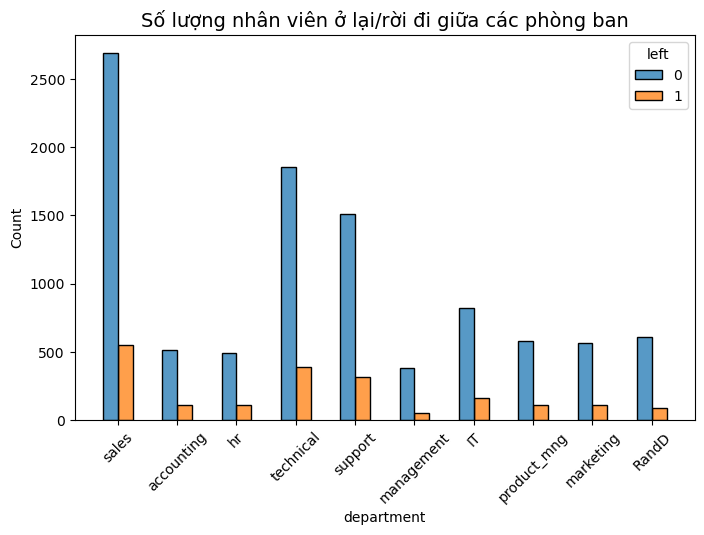

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Số lượng nhân viên ở lại/rời đi giữa các phòng ban', fontsize=14)

Không có khác biệt quá nhiều giữa tỷ lệ người ở lại hay rời đi giữa các phòng ban

<b> Kiểm tra mối tương quan giữa các biến

In [53]:
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Text(0.5, 1.0, 'Bản đồ nhiệt về sự tương quan')

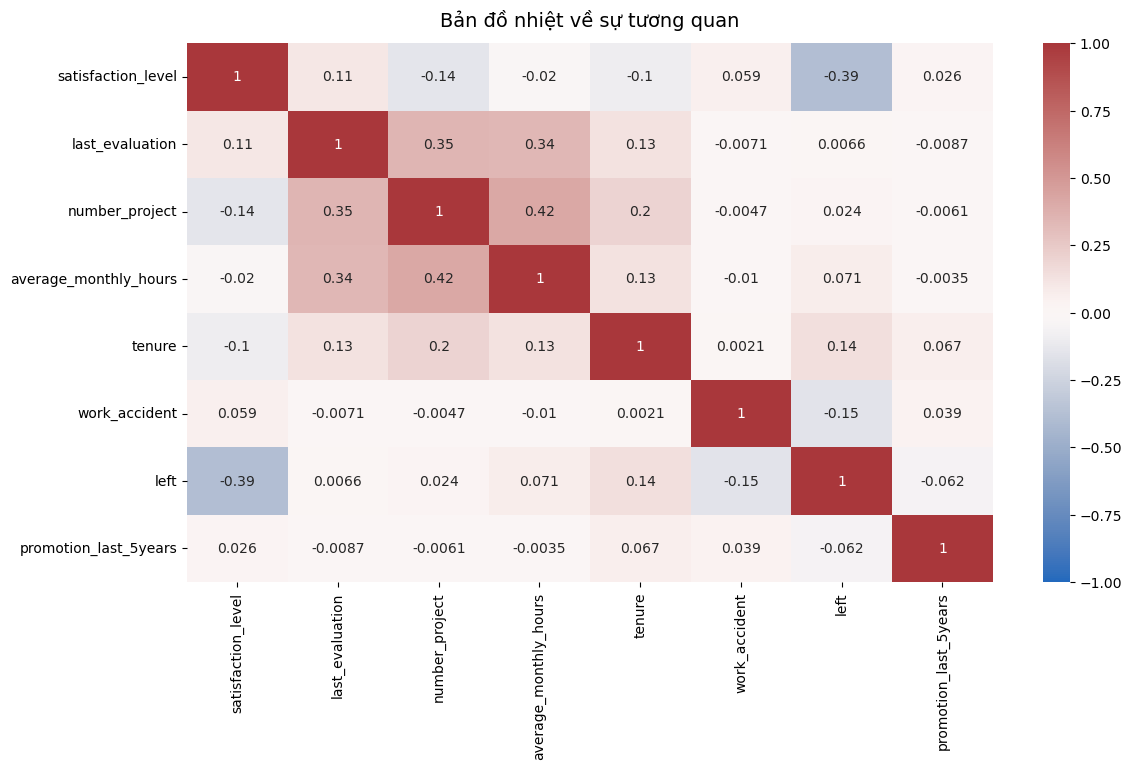

In [54]:
plt.figure(figsize=(13, 7))
heatmap = sns.heatmap(df0.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True) )
heatmap.set_title('Bản đồ nhiệt về sự tương quan', fontdict={'fontsize':14}, pad=12)

Số lượng dự án, giờ làm việc và điểm đánh giá năng suất có tương quan thuận với nhau, đồng thời việc rời đi của nhân viên có tương quan nghịch với mức độ hài lòng của họ. 

## 3. Xây dựng model

<b> Xác định loại bài toán dự đoán.

Mục tiêu của dự án là dự đoán liệu một nhân viên có rời công ty hay không, đây là một biến kết quả dạng phân loại (categorical outcome variable). Do đó, bài toán này thuộc dạng phân loại (classification).

Cụ thể hơn, đây là bài toán phân loại nhị phân (binary classification), vì biến kết quả "left" chỉ có thể nhận một trong hai giá trị:

1 → Nhân viên rời công ty. Và
0 → Nhân viên không rời công ty.

<b> Xác định loại mô hình phù hợp cho bài toán này

Bởi biến kết quả dạng phân loại cho nên chúng ta có thể dùng mô hình Logistic Regression, hoặc mô hình Tree-based Machine Learning.

Chúng ta có thể sử dụng một trong hai hoặc cả hai để so sánh sự hiệu quả.

### Mô hình A: Logistic Regression Model

Trước khi chia dữ liệu train và test thì cần chuyển đổi các biến không phải số. Biến ['department'] và ['salary']. 

In [61]:
df_enc = df1.copy()

df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes)

df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


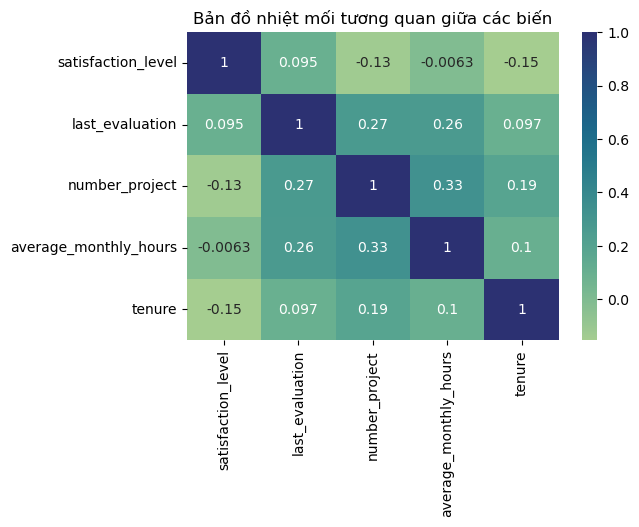

In [62]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Bản đồ nhiệt mối tương quan giữa các biến')
plt.show()

Đồng thời loại bỏ các giá trị ngoại lệ tại cột 'tenure' 

In [64]:
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


Chọn các biến và chia dữ liệu train-test

In [66]:
y = df_logreg['left']

x = df_logreg.copy()
x = x.drop('left', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

Xây dựng mô hình Logistic Regression

In [68]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(x_train, y_train)

In [69]:
y_pred = log_clf.predict(x_test)

Tạo confusion matrix để trực quan kết quả dự đoán của mô hình

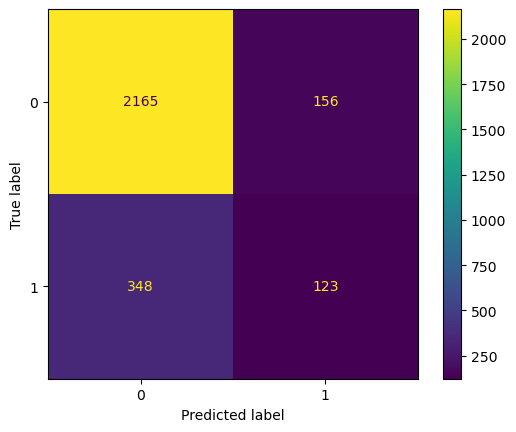

In [71]:
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

log_disp.plot()
plt.show()

Góc trên bên trái → Số lượng True Negatives (TN):
Số nhân viên không rời công ty mà mô hình dự đoán chính xác là không rời.

Góc trên bên phải → Số lượng False Positives (FP):
Số nhân viên không rời công ty, nhưng mô hình dự đoán sai là rời đi.

Góc dưới bên trái → Số lượng False Negatives (FN):
Số nhân viên đã rời công ty, nhưng mô hình dự đoán sai là không rời.

Góc dưới bên phải → Số lượng True Positives (TP):
Số nhân viên đã rời công ty mà mô hình dự đoán chính xác là rời đi.

Một mô hình hoàn hảo sẽ có toàn bộ dự đoán là True Negatives và True Positives, không có False Negatives hoặc False Positives.

Ở đây số lượng True Positives thấp, chúng ta có thể kiểm tra sự cân bằng số giá trị cột 'left' 

In [74]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

Dữ liệu có tỷ lệ xấp xỉ 83%-17%. Điều này có nghĩa là dữ liệu cân bằng, nhưng cũng không quá mất cân đối. Nếu dữ liệu bị mất cân đối nghiêm trọng hơn, có thể cần thực hiện tái lấy mẫu (resampling) để làm cho tỷ lệ cân bằng hơn.

Trong trường hợp này, có thể sử dụng dữ liệu mà không cần điều chỉnh tỷ lệ giữa các lớp và tiếp tục đánh giá mô hình.

Chúng ta kiểm tra các chỉ số của mô hình:

Accuracy: Là tỷ lệ tổng số dự đoán đúng trên tổng số dự đoán.

Precision: Trong số các mẫu được dự đoán là dương (positive), có bao nhiêu mẫu thực sự đúng.

Recall: Trong số các mẫu thực sự là dương (positive), có bao nhiêu mẫu được mô hình dự đoán đúng.

F1: Dùng khi cần cân bằng giữa Precision và Recall. Hữu ích khi dữ liệu mất cân đối

In [77]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



Báo cáo phân loại ở trên cho thấy mô hình hồi quy logistic đạt được:

Precision: 79%.
Recall: 82%.
F1-score: 80%.
Accuracy: 82%.
Đều là điểm weighted avg (trung bình có trọng số của các mẫu).

Tuy nhiên, nếu mục tiêu quan trọng nhất là dự đoán chính xác những nhân viên rời công ty, thì các chỉ số này đang quá thấp.

### Mô hình B: Mô hình Tree-based

In [80]:
y = df_enc['left']

x = df_enc.copy()
x = x.drop('left', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

<b> Decision tree - 1

Xây dựng mô hình decision tree và sử dụng Grid-search kiểm tra chéo giá trị (cross-validated) để tìm giá trị parameter phù hợp nhất. 

Ở đây giá trị được chọn để mô hình tối đa hoá nó là 'roc_auc', chỉ số đánh giá hiệu suất của mô hình phân loại. Càng gần 1 thì càng chính xác.

ROC curve là biểu đồ thể hiện mối quan hệ giữa True Positive Rate và False Positive Rate, AUC là giá trị diện tích dưới đường cong ROC, dao động từ 0 đến 1.

In [83]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4,6,8,None],
             'min_samples_leaf':[1,2,5],
             'min_samples_split':[2,4,6]}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# roc_auc là chỉ số đánh giá hiệu suất của mô hình phân loại. Càng gần 1 thì càng chính xác

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [89]:
%%time
tree1.fit(x_train, y_train)

CPU times: total: 3.34 s
Wall time: 3.38 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

Xác định các giá trị parameter tối ưu

In [91]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Xác định chỉ số 'roc_auc' 

In [93]:
tree1.best_score_

0.969819392792457

Chỉ số 'roc-auc' rất tốt, cho thấy mô hình có thể dự đoán tốt việc nhân viên nào sẽ rời đi  

Thể hiện tất cả các chỉ số của Grid-search

In [96]:
def make_results(model_name, model_object, metric):

    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'}

    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]})
  
    return table

In [97]:
tree1_cv_results = make_results("Decision Tree CV", tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.914552,0.916949,0.915707,0.971978,0.969819


Tất cả các chỉ số từ mô hình tree1 đều là những dấu hiệu mạnh mẽ cho thấy hiệu suất mô hình tốt.

Decision Tree có thể dễ bị overfitting, chúng ta có thể sử dụng Random Forest giúp tránh overfitting bằng cách kết hợp nhiều Decision Tree để đưa ra dự đoán.

<b> Random forest - 1

In [121]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [123]:
#%%time
#rf1.fit(x_train, y_train)

CPU times: total: 18min 23s
Wall time: 18min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

Thời gian chạy để phù hợp x_train, y_train cho 300 hay 500 Decision tree là khá lâu, chúng ta có thể dùng phương pháp pickle để lưu lại kết quả nhằm tránh mất thời gian mỗi khi chạy thử nghiệm

In [125]:
import os
print(os.getcwd())

C:\Users\thuan\Project


In [127]:
path = 'C:/Users/thuan/Project/RF results/'

In [129]:
def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [131]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [133]:
#write_pickle(path, rf1, 'hr_rf1')

In [135]:
rf1 = read_pickle(path, 'hr_rf1')
rf1

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

Xem chỉ số 'roc-auc' và giá trị các parameter tối ưu cho mô hình

In [137]:
rf1.best_score_

0.9804250949807172

In [139]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [141]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  Decision Tree CV   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


Các chỉ số đánh giá của mô hình Random Forest tốt hơn so với mô hình Decision Tree, ngoại trừ recall (điểm recall của mô hình Random Forest thấp hơn khoảng 0.001, một mức không đáng kể). Điều này cho thấy mô hình Random Forest nhìn chung vượt trội hơn so với mô hình Decision Tree.

Tạo function cho biết các chỉ số của mô hình khi dự đoán x_test, sau đó được so sánh với y_test

In [143]:
def get_scores(model_name:str, model, x_test_data, y_test_data):

    preds = model.best_estimator_.predict(x_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [145]:
rf1_test_scores = get_scores('random forest1 test', rf1, x_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


Các điểm số trên tập test rất giống với điểm số trên tập train. Điều này cho thấy mô hình có độ mạnh cao. Vì tập test chỉ được sử dụng cho mô hình này, có thể nói rằng hiệu suất của mô hình trên tập dữ liệu này sẽ phản ánh đúng cách nó hoạt động trên dữ liệu mới hay chưa từng thấy.

Tạo confusion matrix cho rf

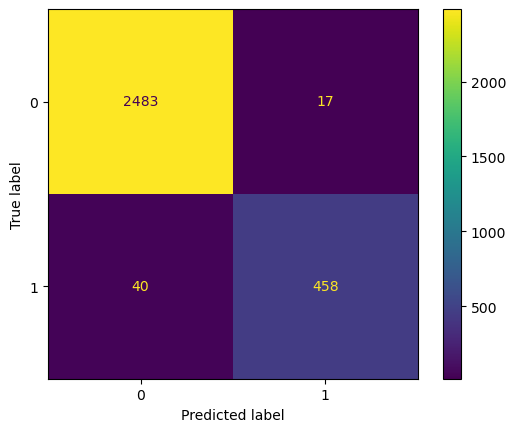

In [147]:
y_pred = rf1.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels = rf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = rf1.classes_)
disp.plot()

Có thể thấy số lượng False Negative và False Positive của mô hình Random Forest là rất thấp.

<b> Sự phân chia quyết định của Decision Tree

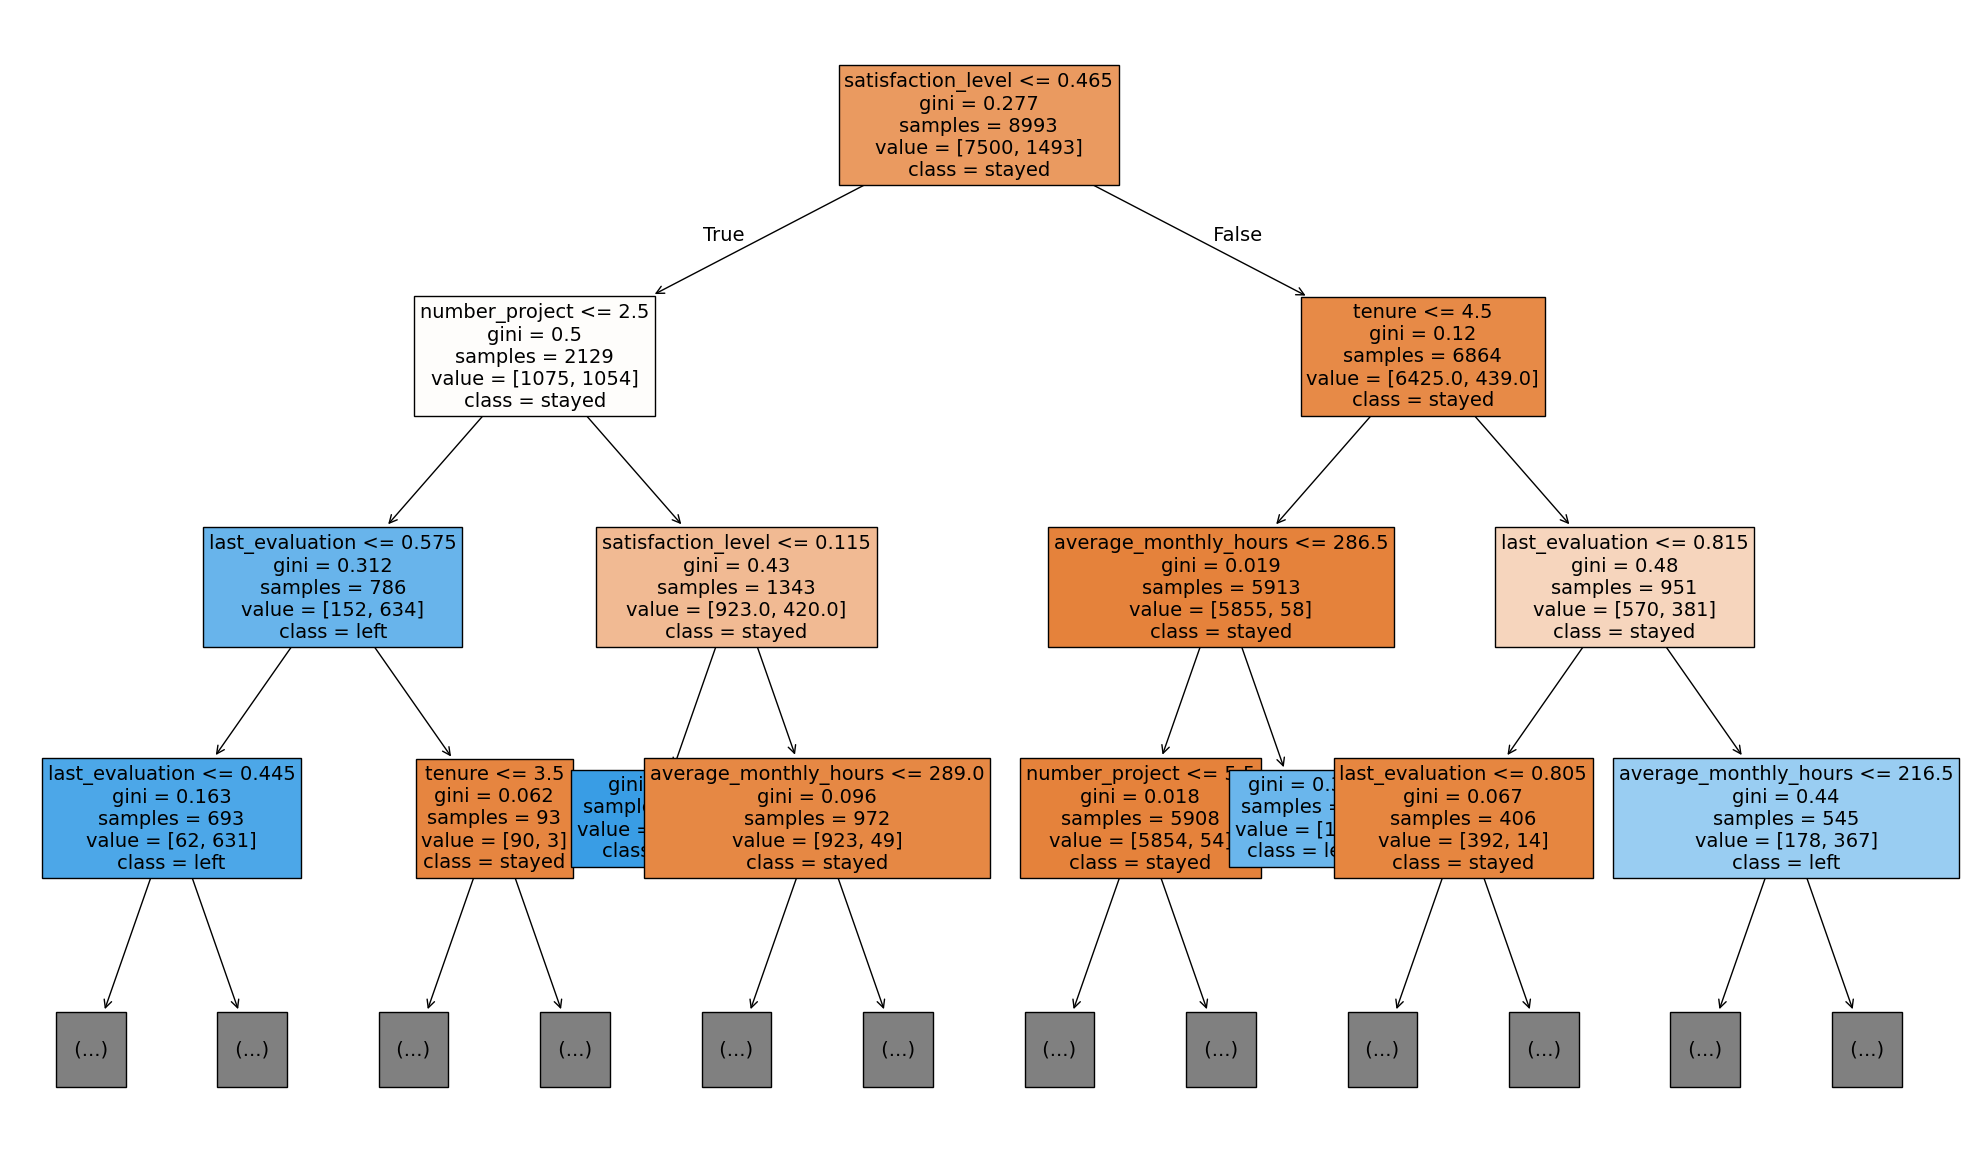

In [149]:
plt.figure(figsize=(25,15))
plot_tree(tree1.best_estimator_, max_depth=3, fontsize=14, feature_names=x.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

<b> Yếu tố quan trọng rút ra từ Decision tree

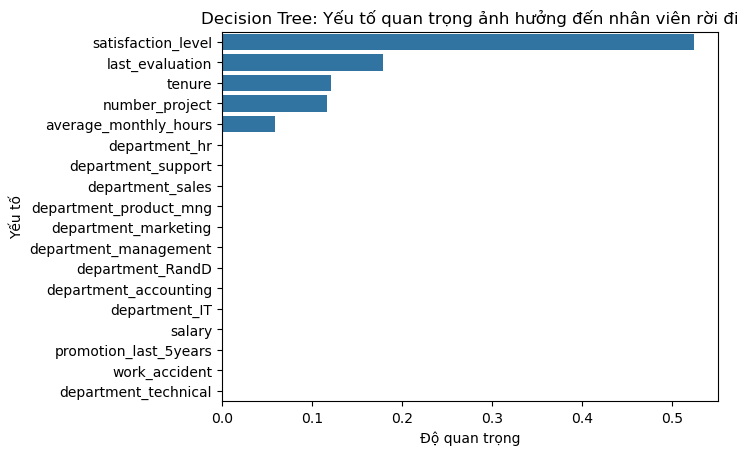

In [151]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, columns = ['gini_importance'], index=x.columns)
tree1_importances = tree1_importances.sort_values('gini_importance', ascending=False)
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Yếu tố quan trọng ảnh hưởng đến nhân viên rời đi", fontsize=12)
plt.ylabel("Yếu tố")
plt.xlabel("Độ quan trọng")
plt.show()

Biểu đồ trên cho thấy mô hình Decision Tree cho biết các yếu tố 'satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours' là quan trọng nhất. Các biến này là các biến hữu dụng nhất để dự đoán biến kết quả là 'left'.

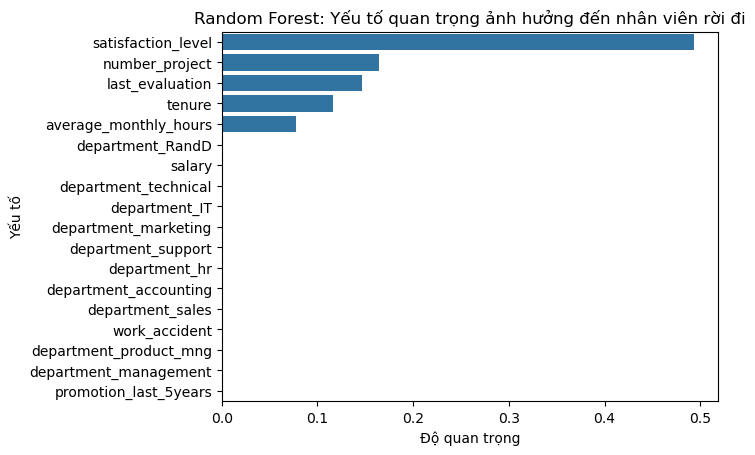

In [153]:
rf1_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_, columns=['gini'], index=x.columns)
rf1_importances = rf1_importances.sort_values('gini', ascending=False)
sns.barplot(data=rf1_importances, x='gini', y = rf1_importances.index, orient='h')
plt.title("Random Forest: Yếu tố quan trọng ảnh hưởng đến nhân viên rời đi", fontsize=12)
plt.xlabel("Độ quan trọng")
plt.ylabel("Yếu tố")
plt.show()

Biểu đồ trên cho thấy mô hình Random Forest cho biết các yếu tố 'satisfaction_level', 'number_project', 'last_evaluation', 'tenure', 'average_monthly_hours' là quan trọng nhất. Các biến này là các biến hữu dụng nhất để dự đoán biến kết quả là 'left'.

## 4. Tổng hợp kết quả

<b> Kết quả của các mô hình

<b> Logistic Regression

Mô hình hồi quy Logistic có chỉ số Precision: 79%, Recall: 82%, F1-score: 80% (đều là điểm weighted average) và Accuracy: 82% khi dự đoán phần dữ liệu test. 

<b> Tree-based Machine Learning

Sau khi so sánh giữa Decision Tree và Random Forest thì mô hình Random Forest có các chỉ số đánh giá hiệu suất dự đoán nhỉnh hơn của Decision Tree.



model	|precision	|recall	|f1	|accuracy	|AUC|
-----|-----|-----|-----|-----|-----|
random forest1 test	|0.964211	|0.919679	|0.941418	|0.980987	|0.956439

Và theo đó chúng ta biết được mức độ quan trọng của các yếu tố ảnh hưởng tới việc nhân viên rời khỏi công ty. Các yếu tố theo thứ tự quan trọng giảm dần: 'satisfaction_level', 'number_project', 'last_evaluation', 'tenure', 'average_monthly_hours'


<b> Kết luận, đề xuất, các bước tiếp theo

Các mô hình và tầm quan trọng của các yếu tố được trích xuất từ mô hình cho thấy rằng nhân viên trong công ty đang làm việc quá sức.

Có các đề xuất sau để giữ chân nhân viên:

- Giới hạn số lượng dự án mà nhân viên có thể làm.
- Cân nhắc thăng chức cho những nhân viên đã làm việc tại công ty ít nhất bốn năm hoặc tiến hành tìm hiểu thêm về lý do tại sao nhân viên có thâm niên bốn năm lại không hài lòng như vậy.
- Hoặc thưởng cho nhân viên làm việc nhiều giờ hơn, hoặc không yêu cầu họ làm việc quá mức.
- Nếu nhân viên không nắm rõ chính sách trả lương ngoài giờ của công ty, hãy thông báo cho họ. Nếu kỳ vọng về khối lượng công việc và thời gian nghỉ phép chưa rõ ràng, hãy làm rõ chúng.
- Tổ chức các cuộc thảo luận trong toàn công ty và trong từng nhóm để hiểu và giải quyết văn hóa làm việc của công ty, cả trên phạm vi rộng và trong từng bối cảnh cụ thể.
- Điểm đánh giá hiệu suất cao không nên chỉ dành cho những nhân viên làm việc hơn 200 giờ mỗi tháng. Hãy cân nhắc một thang điểm tương xứng để nhân viên có thể đóng góp nhiều hơn hoặc nỗ lực nhiều hơn.

<b> Các bước tiếp theo

Nếu lo ngại về vấn đề rò rỉ dữ liệu. Chúng ta có thể điều chỉnh các yếu tố để tránh việc sử dụng các biến không hợp lý. Ví dụ như biến 'average_monthly_hours' chúng ta có thể chia ra nhân viên làm quá giờ hay không (giờ > giờ làm việc trung bình) 

# Kết thúc